# Making predictions over amazon recommendation dataset

## Predictions

 The purpose of this analysis is to make up a prediction model where we will be able to predict whether a recommendation is yes or no. 
In this analysis, we will focus on the Score along with the yes or no sentiment of the recommendation. 
To do so, we will work on Amazon's recommendation dataset. When the data is ready, we will load it into KNN algorithms, naïve Bayesian Algorithm.
In the end, we hope to find a "best" model for predicting the recommendation's sentiment.

## Import the data

In order to load the data, we will use the EXCEL  dataset where we will only fetch the Score and the recommendation summary. 
As we only want to get the global sentiment of the recommendations (YES or NO), we will purposefully use all Scores equal to 3. If the score id above 3,
then the recommendation will be set to "YES". Otherwise, it will be set to "NO". 
The data will be split into a message set and a set1 set.


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

# Show  the details of  the REVIEWS.CSV file 

In [3]:
link="E:/"
messages= pd.read_csv(link+"Reviews.csv")
col=messages.columns.tolist()
print(col)
messages.head()
Reviewsnum=messages[col[:]]
Reviewsnum.head(len(messages))

['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
messages.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Dimensions of DATA


In [23]:
messages.shape

(100, 10)

# Print avg score

In [25]:
messages["Score"].mean()

4.26

# Statistics of  all productIds

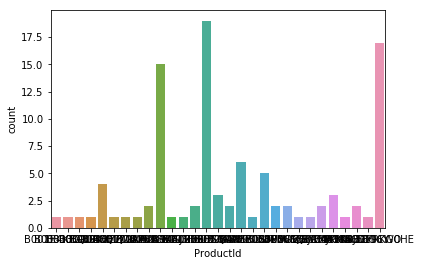

In [52]:
sns.countplot(messages['ProductId'])

# It having more than 4 star  rating product details

In [53]:
 fivestar=messages[(messages["Score"]>4)]
fivestar.head(len(messages))

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5,1262044800,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...


# Name of all  product Id's

In [54]:
list1=[]
c=0
products=messages['ProductId']
for i in products:
    list1.append(i)
    c=c+1
       
print(list1)
print(c)

['B001E4KFG0', 'B00813GRG4', 'B000LQOCH0', 'B000UA0QIQ', 'B006K2ZZ7K', 'B006K2ZZ7K', 'B006K2ZZ7K', 'B006K2ZZ7K', 'B000E7L2R4', 'B00171APVA', 'B0001PB9FE', 'B0009XLVG0', 'B0009XLVG0', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B001GVISJM', 'B00144C10S', 'B0001PB9FY', 'B003F6UO7K', 'B003F6UO7K', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B001EO5QW8', 'B000G6RPMY', 'B000G6RPMY', 'B000G6RPMY', 'B002GWHC0G', 'B002GWHC0G', 'B004N5KULM', 'B004N5KULM', 'B004N5KULM', 'B004N5KULM', 'B004N5KULM', 'B004N5KULM', 'B001EO5TPM', 'B005DUM9UQ', 'B005DUM9UQ', 'B005DUM9UQ', 'B005DUM9UQ', 'B005DUM9UQ', 'B000E7VI7S', 'B000E7VI7S', 'B001GVISJC', 'B001

# List of all product Id's uniquely

In [55]:
list2=[]
morefive=fivestar['ProductId']
for i in products:
    list2.append(i)
       
set1=set(list2)


In [57]:
print(list(set1))

['B000UA0QIQ', 'B001EO5QW8', 'B000E7VI7S', 'B0009XLVG0', 'B002GWHC0G', 'B00171APVA', 'B0001PB9FY', 'B0059WXJKM', 'B00813GRG4', 'B003ZFRKGO', 'B000G6RPMY', 'B005R8JE8O', 'B006K2ZZ7K', 'B00144C10S', 'B003F6UO7K', 'B006SQBRMA', 'B004X2KR36', 'B001E4KFG0', 'B000LQOCH0', 'B001GVISJC', 'B001GVISJM', 'B0019CW0HE', 'B001EO5TPM', 'B001EPPI84', 'B0066DMI6Y', 'B005DUM9UQ', 'B004N5KULM', 'B000E7L2R4', 'B0001PB9FE']


# Enter the productID and get the avarage score of that product along with diagram of how many ratting it having

# enter the product id and get the details

Here is  your product ids : 
['B000UA0QIQ', 'B001EO5QW8', 'B000E7VI7S', 'B0009XLVG0', 'B002GWHC0G', 'B00171APVA', 'B0001PB9FY', 'B0059WXJKM', 'B00813GRG4', 'B003ZFRKGO', 'B000G6RPMY', 'B005R8JE8O', 'B006K2ZZ7K', 'B00144C10S', 'B003F6UO7K', 'B006SQBRMA', 'B004X2KR36', 'B001E4KFG0', 'B000LQOCH0', 'B001GVISJC', 'B001GVISJM', 'B0019CW0HE', 'B001EO5TPM', 'B001EPPI84', 'B0066DMI6Y', 'B005DUM9UQ', 'B004N5KULM', 'B000E7L2R4', 'B0001PB9FE']
Enter the product id to get the details: B0009XLVG0
NO of review points on this product: 
[5, 1]
no of rating given: 
2
Average rating: 
3.0


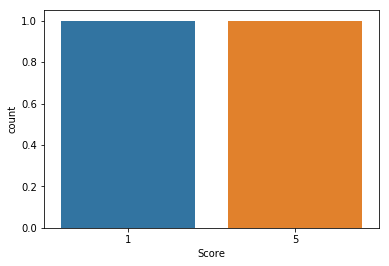

In [59]:
print("Here is  your product ids : ")
print(list(set1))
t=input("Enter the product id to get the details: ")
details=messages[messages["ProductId"]==t]
temp=list(details["Score"])
print("NO of review points on this product: ")
print(temp)
c=0
for i in temp:
    c=c+1
print("no of rating given: ")
print(c)
total=sum(temp)
avg=total/c
print("Average rating: ")
print(avg)
sns.countplot(details['Score'])

## check the commment of  a perticular product

In [61]:
t=input("Enter the product id to see the review : ")
details=messages[messages["ProductId"]==t]
temp2=details["Text"]
print(temp2)

Enter the product id to see the review : B0009XLVG0
11    One of my boys needed to lose some weight and ...
12    My cats have been happily eating Felidae Plati...
Name: Text, dtype: object


# Enter the productID  according to the rating  print the comment

In [67]:
t=input("Enter the product id to get the details: ")
details=messages[messages["ProductId"]==t]
def whybad(Id):
    details=messages[messages["ProductId"]==t]
    temp2=details["Text"]
    print(temp2)
if avg>=4:
    print("This product is performing well ")
else:
    print("This product is not performing well ")
    print("Why it is not good?")
    whybad(t)

Enter the product id to get the details: B0009XLVG0
This product is not performing well 
Why it is not good?
11    One of my boys needed to lose some weight and ...
12    My cats have been happily eating Felidae Plati...
Name: Text, dtype: object


# Print the type of positive word

In [17]:
pos=['good','great','awesome','excellent','loved','love']
print(type(messages['Text'][0]))

<class 'str'>


## Total no of words for perticular product


In [12]:
words=[]
for i in range(len(details)):
    words.append(str(details['Text']))
print(words)

["13    good flavor! these came securely packed... the...\n14    The Strawberry Twizzlers are my guilty pleasur...\n15    My daughter loves twizzlers and this shipment ...\n16    I love eating them and they are good for watch...\n17    I am very satisfied with my Twizzler purchase....\n18    Twizzlers, Strawberry my childhood favorite ca...\n19    Candy was delivered very fast and was purchase...\n20    My husband is a Twizzlers addict.  We've bough...\n21    I bought these for my husband who is currently...\n22    I can remember buying this candy as a kid and ...\n23    I love this candy.  After weight watchers I ha...\n24    I have lived out of the US for over 7 yrs now,...\n25    Product received is as advertised.<br /><br />...\n26    The candy is just red , No flavor . Just  plan...\n27    I was so glad Amazon carried these batteries. ...\nName: Text, dtype: object", "13    good flavor! these came securely packed... the...\n14    The Strawberry Twizzlers are my guilty pleasur...\n

In [13]:
details['Text'].iloc[:,]

13    good flavor! these came securely packed... the...
14    The Strawberry Twizzlers are my guilty pleasur...
15    My daughter loves twizzlers and this shipment ...
16    I love eating them and they are good for watch...
17    I am very satisfied with my Twizzler purchase....
18    Twizzlers, Strawberry my childhood favorite ca...
19    Candy was delivered very fast and was purchase...
20    My husband is a Twizzlers addict.  We've bough...
21    I bought these for my husband who is currently...
22    I can remember buying this candy as a kid and ...
23    I love this candy.  After weight watchers I ha...
24    I have lived out of the US for over 7 yrs now,...
25    Product received is as advertised.<br /><br />...
26    The candy is just red , No flavor . Just  plan...
27    I was so glad Amazon carried these batteries. ...
Name: Text, dtype: object

# Negative words in comment¶

In [14]:
neg=['bad','worst']

In [15]:
negcount=0
for i in words:
    for i in neg:
        negcount=negcount+1
print(negcount)

30


# Positive words in comment

In [18]:
poscount=0
for i in words:
    if i in pos:
        poscount=poscount+1
print(poscount)

0


# Print details for a particular product id

In [85]:
t=input("Enter the product id to see the review : ")
details=messages[messages["ProductId"]==t]
temp2=details["Text"]

details.head(len(details))

Enter the product id to see the review : B000E7VI7S


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
68,69,B000E7VI7S,A1KL2LAW08X6UQ,calmnsense,0,0,3,1169251200,How much would you pay for a bag of chocolate ...,"If you're impulsive like me, then $6 is ok. Do..."
69,70,B000E7VI7S,AWCBF2ZWIN57F,C. Salcido,0,2,5,1185753600,pretzel haven!,this was sooooo deliscious but too bad i ate e...


# User recomendation to buy this product according to their comment

User recomendation to buy this product is 0.0 %
User recomendation not to buy this product is 100.0 %


<function matplotlib.pyplot.show(*args, **kw)>

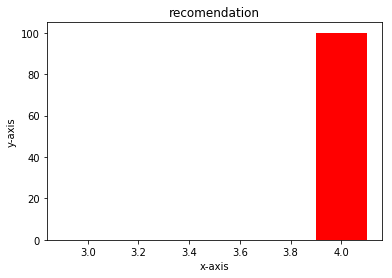

In [19]:
total=poscount+negcount
posper=(poscount/total)*100
print("User recomendation to buy this product is",posper,"%")
negper=(negcount/total)*100
print("User recomendation not to buy this product is",negper,"%")
left=[3,4]
height=[posper,negper]
label=['one','two','three','four','five']
plt.bar(left,height,label=label,width=.2,color=['green','red'])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('recomendation')
plt.show

In [87]:
count=0
string="hi i am a good boy, i am  from murshidabad, i am a b.tech student"
sub=['i','am']
print(sub)
string.split()
for i in string:
    if  i in sub:
        count=count+1
        
print(count)

['i', 'am']
5


# print all text

In [21]:
for i in range(100):
    print("Review #",i+1)
    print(messages.Text[i].split())
    print(i)

Review # 1
['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality.', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better.', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most.']
0
Review # 2
['Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanuts...the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted.', 'Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', '"Jumbo".']
1
Review # 3
['This', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few', 'centuries.', 'It', 'is', 'a', 'light,', 'pillowy', 'citrus', 'gelatin', 'with', 'nuts', '-', 'in', 'this', 'case', 'Filberts.', 'And', 'it', 'is', 'cut', 'into', 'tiny', 'squares', 'and', 't

Review # 59
['Great', 'product,', 'nice', 'combination', 'of', 'chocolates', 'and', 'perfect', 'size!', 'The', 'bags', 'had', 'plenty,', 'and', 'they', 'were', 'shipped', 'promptly.', 'The', 'kids', 'in', 'the', 'neighborhood', 'liked', 'our', 'candies!']
58
Review # 60
['Halloween', 'is', 'over', 'but,', 'I', 'sent', 'a', 'bag', 'to', 'my', 'daughters', 'class', 'for', 'her', 'share.', 'The', 'chocolate', 'was', 'fresh', 'and', 'enjoyed', 'by', 'many.']
59
Review # 61
['Watch', 'your', 'prices', 'with', 'this.', 'While', 'the', 'assortment', 'was', 'good,', 'and', 'I', 'did', 'get', 'this', 'on', 'a', 'gold', 'box', 'purchase,', 'the', 'price', 'for', 'this', 'was<br', '/>$3-4', 'less', 'at', 'Target.']
60
Review # 62
['This', 'bag', 'of', 'candy', 'online', 'is', 'pretty', 'expensive,', 'it', 'should', 'be', 'cheaper', 'in', 'order', 'to', 'compete', 'with', 'grocery', 'stores,', 'other', 'than', 'that,', 'its', 'a', 'good', 'combination', 'of', 'my', 'favorite', 'candy']
61
Review #

In [22]:
t=input("Enter the product id to see the review : ")
details=messages[messages["ProductId"]==t]
temp2=str(details['Text']).split()

print(temp2)

count1=0
sub=['got','this','for','is']
for i in temp2:
    if i in sub:
        count1=count1+1
        

        print(count1)

Enter the product id to see the review : B001GVISJM
['13', 'good', 'flavor!', 'these', 'came', 'securely', 'packed...', 'the...', '14', 'The', 'Strawberry', 'Twizzlers', 'are', 'my', 'guilty', 'pleasur...', '15', 'My', 'daughter', 'loves', 'twizzlers', 'and', 'this', 'shipment', '...', '16', 'I', 'love', 'eating', 'them', 'and', 'they', 'are', 'good', 'for', 'watch...', '17', 'I', 'am', 'very', 'satisfied', 'with', 'my', 'Twizzler', 'purchase....', '18', 'Twizzlers,', 'Strawberry', 'my', 'childhood', 'favorite', 'ca...', '19', 'Candy', 'was', 'delivered', 'very', 'fast', 'and', 'was', 'purchase...', '20', 'My', 'husband', 'is', 'a', 'Twizzlers', 'addict.', "We've", 'bough...', '21', 'I', 'bought', 'these', 'for', 'my', 'husband', 'who', 'is', 'currently...', '22', 'I', 'can', 'remember', 'buying', 'this', 'candy', 'as', 'a', 'kid', 'and', '...', '23', 'I', 'love', 'this', 'candy.', 'After', 'weight', 'watchers', 'I', 'ha...', '24', 'I', 'have', 'lived', 'out', 'of', 'the', 'US', 'for',

# Search words with respect to the particular product id

In [4]:
t=input("Enter the product id to see the review : ")
details=messages[messages["ProductId"]==t]
temp3=list(details['Id'])
print(temp3)
list4=[]
for i in temp3:
    list4.append(i-1)
    for i  in list4:
    list5=messages.Text[i].lower().split()
print(list5)

count1=0
sub=['deal','incredible','magic','good','loved','excellent!']
for i in list5:
    if i in sub:
        count1=count1+1
        
print(count1)

Enter the product id to see the review : B001GVISJM
[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
['i', 'was', 'so', 'glad', 'amazon', 'carried', 'these', 'batteries.', 'i', 'have', 'a', 'hard', 'time', 'finding', 'them', 'elsewhere', 'because', 'they', 'are', 'such', 'a', 'unique', 'size.', 'i', 'need', 'them', 'for', 'my', 'garage', 'door', 'opener.<br', '/>great', 'deal', 'for', 'the', 'price.']
1


### Total number of Positive and Negetive Comments

In [32]:
score_count = messages.groupby(['ProductId','HelpfulnessNumerator']).size()
print("Checking Score Variable for ProductId Segregation: \n",score_count)
score_total =messages.groupby(['Score']).size()
print("Checking Total Score: ",score_total)

Checking Score Variable for ProductId Segregation: 
 ProductId   HelpfulnessNumerator
B0001PB9FE  1                        1
B0001PB9FY  1                        1
B0009XLVG0  1                        1
            4                        1
B000E7L2R4  1                        1
B000E7VI7S  0                        2
B000G6RPMY  0                        1
            1                        1
            4                        1
B000LQOCH0  1                        1
B000UA0QIQ  3                        1
B00144C10S  0                        1
B00171APVA  0                        1
B0019CW0HE  0                       11
            1                        3
            4                        2
            5                        1
B001E4KFG0  1                        1
B001EO5QW8  0                       11
            1                        3
            2                        1
            3                        1
            9                        1
            13   

# Comparely graph representation 

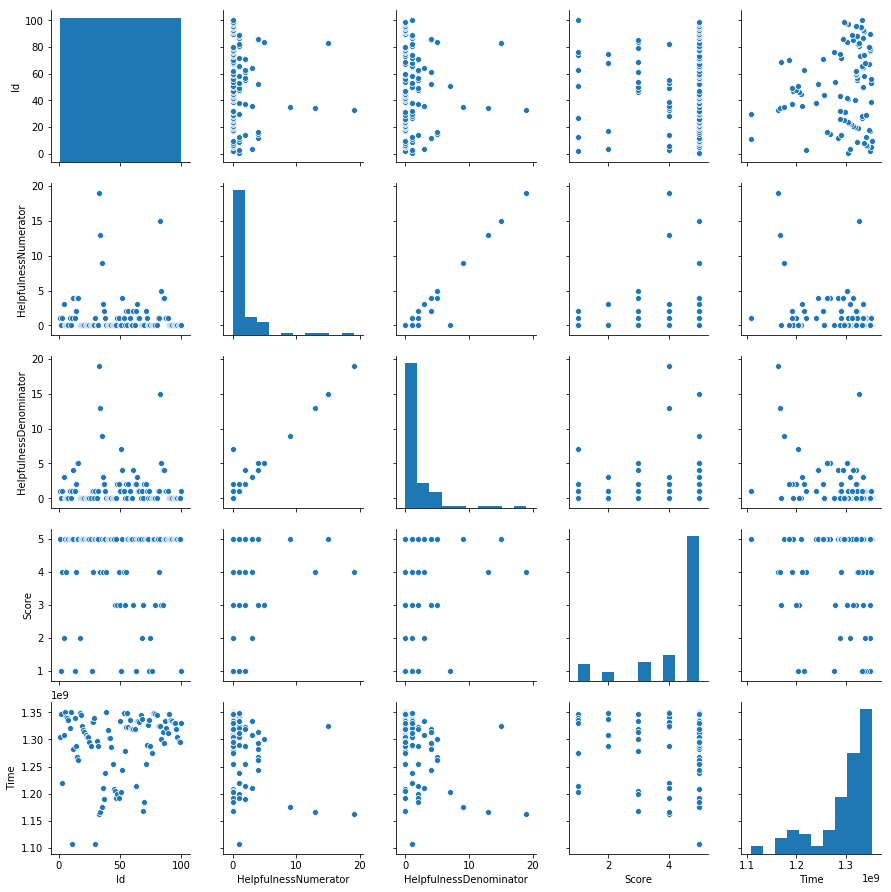

In [21]:
  sns.pairplot(messages)

# Co-relation of messages

In [27]:
messages.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,-0.038706,-0.033605,0.010222,0.168646
HelpfulnessNumerator,-0.038706,1.000000,0.962803,0.016171,-0.343276
HelpfulnessDenominator,-0.033605,0.962803,1.000000,-0.077652,-0.381798
Score,0.010222,0.016171,-0.077652,1.000000,0.028779
Time,0.168646,-0.343276,-0.381798,0.028779,1.000000


# Heatmap of this co-relation

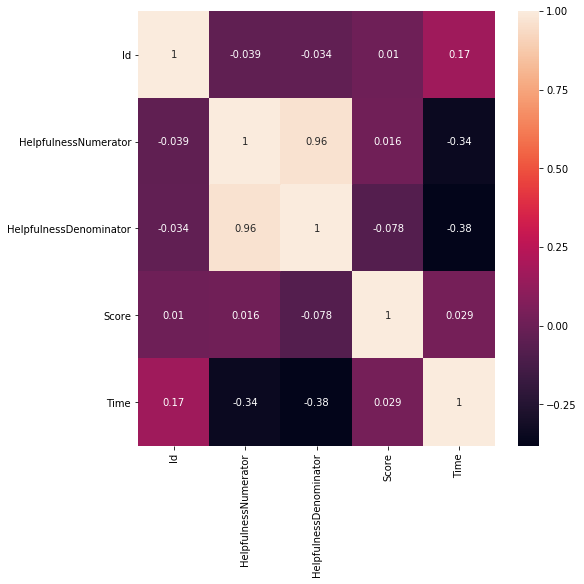

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(messages.corr(),annot=True)

## SHOWING THE PRODUCT ID WITH  RESPECT TO SCORE

In [30]:
score_count = messages.groupby(['Score', 'ProductId']).count()
print("Checking Outlook Variable for Play Segregation: \n",score_count)
score_total = messages.groupby(['Score']).count()
print("Checking Total Outlook: ",score_total)

Checking Outlook Variable for Play Segregation: 
                   Id  UserId  ProfileName  HelpfulnessNumerator  \
Score ProductId                                                   
1     B0009XLVG0   1       1            1                     1   
      B0019CW0HE   1       1            1                     1   
      B001EO5QW8   1       1            1                     1   
      B001EO5TPM   1       1            1                     1   
      B001EPPI84   1       1            1                     1   
      B001GVISJM   1       1            1                     1   
      B0059WXJKM   1       1            1                     1   
      B00813GRG4   1       1            1                     1   
2     B000UA0QIQ   1       1            1                     1   
      B001EPPI84   1       1            1                     1   
      B001GVISJM   1       1            1                     1   
      B005DUM9UQ   1       1            1                     1   
3     B000E7

# Predicting the Helpfulness of Amazon

 Build a model to predict the helpfulness of Amazon reviews. This will improve Amazon selection's of helpful reviews at the top 
of the review section and improve customer's purchasing decisions.It could also help other Reviewers as a guide to writing 
helpful reviews.

HelpfulnessNumerator: no of users who find the review helpful
    
HelpfulnessDenominator: no of users who indicated whether they found the review helpful or not helpful

## include reviews that have more than 5 helpfulness data point only

In [46]:
messages.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [47]:
#select the columns
messages = Summary.iloc[:, [6,5,3]]
messages.head()

,Score,HelpfulnessDenominator,ProfileName
0,5,1,delmartian
1,1,0,dll pa
2,4,1,"Natalia Corres ""Natalia Corres"""
3,2,3,Karl
4,5,0,"Michael D. Bigham ""M. Wassir"""


In [48]:
Help=messages[(messages.HelpfulnessDenominator>5)]
print(Help)


    Score  HelpfulnessDenominator                ProfileName
32      4                      19                  S. Potter
33      4                      13   Megan "Bad at Nicknames"
34      5                       9                 CorbyJames
50      1                       7                  Roberto A
82      5                      15  Johnnycakes "Johnnycakes"


In [49]:
Score=Help[Help['Score']>3]
Score.head()

,Score,HelpfulnessDenominator,ProfileName
32,4,19,S. Potter
33,4,13,"Megan ""Bad at Nicknames"""
34,5,9,CorbyJames
82,5,15,"Johnnycakes ""Johnnycakes"""
